# EAI6000 2023 Spring A Week 2 Assignment

# Section One
Please finish following tasks to demonstrate your conceptual understanding of search algorithms  

### [GRADED  TASK 1.1]
- Please compare BFS, DFS, and IDS

BFS , DFS , and IDS are all Uninformed search algorithms used in graph/tree traversal and pathfinding.

### BFS (Breadth-First Search):
Explores all the vertices at the current level before moving to the next level.
Uses a queue data structure to store nodes.
Guarantees finding the shortest path in terms of the number of edges.

### DFS (Depth-First Search):
Explores as far as possible along a branch before backtracking.
Uses a stack data structure to store nodes, either explicitly or through recursion.
Does not guarantee finding the shortest path.

### IDS (Iterative Deepening Search):
Combines the advantages of BFS and DFS.
Executes DFS with an depth limit until the goal node is found.
Guarantees finding the shortest path, like BFS.
Consumes less memory compared to DFS (Space Efficient) and more time-efficient than BFS.

### [GRADED  TASK 1.2]
- Please compare A* search algorithm to Dijkstra's algorithm 

A* search algorithm and Dijkstra's algorithm are both used for finding the shortest path in graphs. However, there are differences:

### A* search algorithm:
Informed Search Strategy.
Uses a heuristic function to estimate the cost from the current node to the goal node.
Explores nodes with the lowest total cost, combining the cost from the start node to the current node and the heuristic cost.
Can be faster than Dijkstra's algorithm due to the heuristic function, which helps guide the search.
Requires an admissible and consistent heuristic function to guarantee finding the optimal path.

### Dijkstra's algorithm:
Uninformed Search Strategy.
Does not use any heuristic function.
Explores nodes based on the cost from the start node to the current node.
Guarantees finding the shortest path and distance.
Can be slower than A* search algorithm, as it does not have any guidance from a heuristic function.

# Section Two 
### Create A* search algorithm

Please write a function astar() to find the path in a given graph
- start_node: "A"
- end_node: "B"
- the function should return the path from "A" to "B" using A* search algorithm

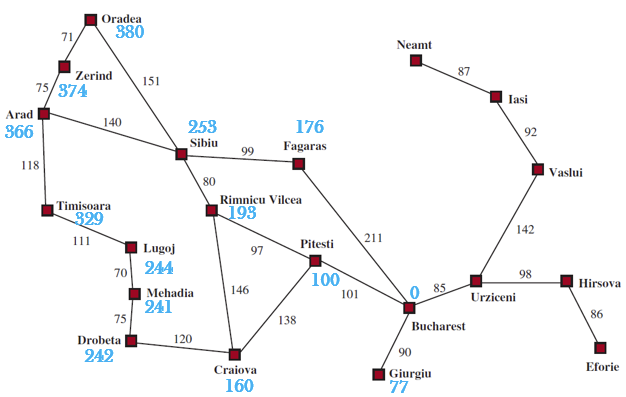

In [56]:
#lists of travel distance between cities
edges_with_distance =[
        ["A", "Z", 75], ["A", "S", 140], ["A", "T", 118],
        ["Z", "O", 71], ["O", "S", 151], ["S", "F", 99],
        ["F", "B", 211], ["B", "G", 90], ["S", "R", 80],
        ["R", "P", 97], ["R", "C", 146], ["P", "B", 101],
        ["P", "C", 138], ["T", "L", 111], ["L", "M", 70],
        ["M", "D", 75], ["D", "C", 120]
       ]

#heuristic information: straight line distance from each city to Bucharest
h = {"A":366, "Z":374, "O":380, "S":253, "F":176, "B":0, "G":77, "P":100, "R":193, "C":160, "D":242, "M":241, "L":244, "T":329}

In [57]:
import heapq

def astar(start_node, end_node, edges_with_distance, h):
    graph = build_graph(edges_with_distance)
    open_set = [(h[start_node], start_node, [], 0)]  # (priority, current_node, path, cost)
    closed_set = set()

    while open_set:
        priority, current_node, path, cost = heapq.heappop(open_set)
        
        # termination
        if current_node == end_node:
            return path + [current_node]

        # Iterate current node
        if current_node not in closed_set:
            closed_set.add(current_node)
            path = path + [current_node]

            # h(n) + f(n), compute and compare in frontier
            for neighbor, edge_cost in graph[current_node].items():
                if neighbor not in closed_set:
                    new_cost = cost + edge_cost
                    heapq.heappush(open_set, (new_cost + h[neighbor], neighbor, path, new_cost))

    return None

# This function is used to create the adjacency lists from the given format of map
def build_graph(edges_with_distance):
    graph = {}
    for edge in edges_with_distance:
        node1, node2, distance = edge
        if node1 not in graph:
            graph[node1] = {}
        graph[node1][node2] = distance
        if node2 not in graph:
            graph[node2] = {}
        graph[node2][node1] = distance
    print(graph)
    return graph


In [58]:
# Test Case 1
start_node = "A"
end_node = "B"
path = astar(start_node, end_node, edges_with_distance, h)
print(f"Path from {start_node} to {end_node}: {path}")

# Test Case 2
start_node = "Z"
end_node = "B"
path = astar(start_node, end_node, edges_with_distance, h)
print(f"Path from {start_node} to {end_node}: {path}")

# Test Case 3
start_node = "M"
end_node = "B"
path = astar(start_node, end_node, edges_with_distance, h)
print(f"Path from {start_node} to {end_node}: {path}")

# Test Case 4
start_node = "L"
end_node = "B"
path = astar(start_node, end_node, edges_with_distance, h)
print(f"Path from {start_node} to {end_node}: {path}")

# Test Case 5
start_node = "P"
end_node = "B"
path = astar(start_node, end_node, edges_with_distance, h)
print(f"Path from {start_node} to {end_node}: {path}")

{'A': {'Z': 75, 'S': 140, 'T': 118}, 'Z': {'A': 75, 'O': 71}, 'S': {'A': 140, 'O': 151, 'F': 99, 'R': 80}, 'T': {'A': 118, 'L': 111}, 'O': {'Z': 71, 'S': 151}, 'F': {'S': 99, 'B': 211}, 'B': {'F': 211, 'G': 90, 'P': 101}, 'G': {'B': 90}, 'R': {'S': 80, 'P': 97, 'C': 146}, 'P': {'R': 97, 'B': 101, 'C': 138}, 'C': {'R': 146, 'P': 138, 'D': 120}, 'L': {'T': 111, 'M': 70}, 'M': {'L': 70, 'D': 75}, 'D': {'M': 75, 'C': 120}}
Path from A to B: ['A', 'S', 'R', 'P', 'B']
{'A': {'Z': 75, 'S': 140, 'T': 118}, 'Z': {'A': 75, 'O': 71}, 'S': {'A': 140, 'O': 151, 'F': 99, 'R': 80}, 'T': {'A': 118, 'L': 111}, 'O': {'Z': 71, 'S': 151}, 'F': {'S': 99, 'B': 211}, 'B': {'F': 211, 'G': 90, 'P': 101}, 'G': {'B': 90}, 'R': {'S': 80, 'P': 97, 'C': 146}, 'P': {'R': 97, 'B': 101, 'C': 138}, 'C': {'R': 146, 'P': 138, 'D': 120}, 'L': {'T': 111, 'M': 70}, 'M': {'L': 70, 'D': 75}, 'D': {'M': 75, 'C': 120}}
Path from Z to B: ['Z', 'A', 'S', 'R', 'P', 'B']
{'A': {'Z': 75, 'S': 140, 'T': 118}, 'Z': {'A': 75, 'O': 71},

# Section Three
## Apply A* search algorithm to find a path in a maze 

The maze is represented by a two-dimensional array. 
- One(1) represents block, zero(0) means clear.
- The agent can only move one step at a time. It can move in four directions - up, down, left, or right
- Each step will incur a cost of 1
- Heuristic: use __Euclidean distance__ to estimate the distance from current location to the destination
- Your function __astar2()__ will return a path from star to end. Please see following cell for an example

In [59]:
maze = [[0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 0]]
    
start = [0, 0] # starting position
end = [5,6]    # ending position

Please don't change this cell

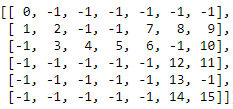


Your results will be similar to the above matrix. 
- Please use numbers to mark your steps in the path (starting from 0)
- Replace the rest with -1

In [60]:
#heuristic is defined as the euclidean

import math
import heapq

def astar2(maze, start, end):

    # must make cordinates in tuple form
    start = tuple(start)
    end = tuple(end)
    
    # define heuristic function
    def heuristic(a, b):
        return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)
    
    
    # initialize data structures
    # frontier
    open_list = []
    # visited
    closed_list = set()
    # previous path/edge
    came_from = {}
    # the cost of the path from the starting position to the current position
    g_score = {start: 0}
    # the sum of the g-score and the heuristic score
    # note that heuristic is calculted from end
    f_score = {start: heuristic(start, end)}
    heapq.heappush(open_list, (f_score[start], start))
    
    # start search
    while open_list:
        # priority q, giving the least f_score element each iteration
        current = heapq.heappop(open_list)[1]
        if current == end:
            print('We find an Exit!\n')
            print('Here is the path:')
            # construct path
            path = []
            # construct the path given the visited previous nodes
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            # since we are constructing from end, we need this to make the path right
            path.reverse()
            # mark path in maze
            for i in range(len(maze)):
                for j in range(len(maze[0])):
                    if (i, j) in path:
                        maze[i][j] = path.index((i, j))
                    else:
                        maze[i][j] = -1
            return maze
        
        # followings are for current node not being the end node
        # initial node
        closed_list.add(current)
        for neighbor in [(current[0]-1, current[1]), (current[0]+1, current[1]), (current[0], current[1]-1), (current[0], current[1]+1)]:
            # supposingly there are four neighbors for a node
            # out of boundary check and see if the node is visited already
            if neighbor[0] < 0 or neighbor[0] >= len(maze) or neighbor[1] < 0 or neighbor[1] >= len(maze[0]) or maze[neighbor[0]][neighbor[1]] == 1 or neighbor in closed_list:
                continue
            
            # all neighbors shall be 1 more than current g score
            tentative_g_score = g_score[current] + 1
            # only if neighbor not in frontier or has lower gscore than existing neighbor, update value 
            if neighbor not in open_list or tentative_g_score < g_score[neighbor]:
                # update previous
                came_from[neighbor] = current
                # update gscore
                g_score[neighbor] = tentative_g_score
                # update fscore
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                # note that fscore instead of gscore is stored in the priority queue
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    # no path found
    return None

# define the executable function
def exe(maze, start, end):
    if start[0] >= len(maze) or end[0] >= len(maze) or start[1] >= len(maze[0]) or end[1] >= len(maze[0]):
        print('Some error here!\nPlease recheck the inputs for start and end.\nLikely out of boundary')
        return None
    if maze[start[0]][start[1]] != 0 or maze[end[0]][end[1]] != 0:
        print('Some error here!\nPlease recheck the inputs for start and end.\nLikely invalid start or end (Wall)')
        return None
    result = astar2(maze, start, end)
    for row in result:
        print(row)

In [61]:
maze = [[0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 0]]

start = [0, 0] # starting position
end = [5,6]    # ending position

# following is the executable

exe(maze, start, end)




We find an Exit!

Here is the path:
[0, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, 7, 8, 9]
[2, 3, 4, 5, 6, -1, 10]
[-1, -1, -1, -1, -1, 12, 11]
[-1, -1, -1, -1, -1, 13, -1]
[-1, -1, -1, -1, -1, 14, 15]


In [62]:
# what if start or end out of bound

start = [0, 0] # starting position
end = [5,16]    # ending position

# following is the executable

exe(maze, start, end)


Some error here!
Please recheck the inputs for start and end.
Likely out of boundary


In [63]:
# what if start or end is on a wall

start = [0, 0] # starting position
end = [4,6]    # ending position

# following is the executable

exe(maze, start, end)

Some error here!
Please recheck the inputs for start and end.
Likely invalid start or end (Wall)
